In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import timedelta as td
import datetime
import seaborn as sns
from datetime import datetime
#sns.set(style="dark")
from scipy import stats as stats

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
df = pd.read_csv ('vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
df1 = df.drop(['county','url','region_url','lat','long','posting_date','image_url','VIN',
               'transmission','description','size', 'type','model'], axis = 1)
df1.tail()

,id,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,drive,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,fwd,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,fwd,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,NaN,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,fwd,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,good,NaN,gas,22716.0,clean,rwd,NaN,wy


In [4]:
df2 = df1.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126189 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            126189 non-null  int64  
 1   region        126189 non-null  object 
 2   price         126189 non-null  int64  
 3   year          126189 non-null  float64
 4   manufacturer  126189 non-null  object 
 5   condition     126189 non-null  object 
 6   cylinders     126189 non-null  object 
 7   fuel          126189 non-null  object 
 8   odometer      126189 non-null  float64
 9   title_status  126189 non-null  object 
 10  drive         126189 non-null  object 
 11  paint_color   126189 non-null  object 
 12  state         126189 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 13.5+ MB


In [7]:
# we are using Tuckey's outlier detection method
def Tuckey_outlier_det(X):
    q1 = X.quantile(0.25)
    q3 = X.quantile(0.75)
    iqr = q3 - q1
    low = q1 - 3*iqr
    high = q3 + 3*iqr
    return low, high

_, high = Tuckey_outlier_det(df3['price'])
print("upper limit:", high)

upper limit: 73250.0


In [8]:
df4 = df3.loc[df3["price"] <= high]
df4

,id,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,drive,paint_color,state
31,7316356412,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,rwd,black,al
32,7316343444,auburn,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,clean,4wd,black,al
33,7316304717,auburn,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,clean,4wd,silver,al
34,7316285779,auburn,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,clean,4wd,grey,al
35,7316257769,auburn,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,clean,4wd,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,wyoming,48590,2020.0,cadillac,good,6 cylinders,gas,7701.0,clean,fwd,black,wy
426860,7301951544,wyoming,39990,2017.0,infiniti,good,8 cylinders,gas,41664.0,clean,4wd,black,wy
426866,7301949190,wyoming,32990,2016.0,infiniti,good,8 cylinders,gas,55612.0,clean,rwd,black,wy
426874,7301591199,wyoming,33590,2018.0,lexus,good,6 cylinders,gas,30814.0,clean,rwd,white,wy


In [9]:
_, high_OM = Tuckey_outlier_det(df['odometer'])
df4 = df4.loc[df4["odometer"] <= high_OM]

In [304]:
df4

,id,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,drive,paint_color,state
31,7316356412,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,rwd,black,al
32,7316343444,auburn,27990,2012.0,gmc,good,8 cylinders,gas,68696.0,clean,4wd,black,al
33,7316304717,auburn,34590,2016.0,chevrolet,good,6 cylinders,gas,29499.0,clean,4wd,silver,al
34,7316285779,auburn,35000,2019.0,toyota,excellent,6 cylinders,gas,43000.0,clean,4wd,grey,al
35,7316257769,auburn,29990,2016.0,chevrolet,good,6 cylinders,gas,17302.0,clean,4wd,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,7301952155,wyoming,48590,2020.0,cadillac,good,6 cylinders,gas,7701.0,clean,fwd,black,wy
426860,7301951544,wyoming,39990,2017.0,infiniti,good,8 cylinders,gas,41664.0,clean,4wd,black,wy
426866,7301949190,wyoming,32990,2016.0,infiniti,good,8 cylinders,gas,55612.0,clean,rwd,black,wy
426874,7301591199,wyoming,33590,2018.0,lexus,good,6 cylinders,gas,30814.0,clean,rwd,white,wy


In [10]:
y  = df4[["price"]]

In [11]:
x = df4[["year","odometer","condition","cylinders","manufacturer","drive"]]
x= pd.get_dummies(data=x, columns=["condition","cylinders","manufacturer","drive"], drop_first=True)

In [383]:
x

,year,odometer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,...,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,drive_fwd,drive_rwd
31,2013.0,128000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32,2012.0,68696.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,2016.0,29499.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,2019.0,43000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
35,2016.0,17302.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,2020.0,7701.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426860,2017.0,41664.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426866,2016.0,55612.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426874,2018.0,30814.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

In [17]:
gbreg = GradientBoostingRegressor(learning_rate=0.1, n_estimators=3000,
                                  min_samples_split = 64, min_samples_leaf=200, max_depth = 200, random_state= 101, 
                                  verbose=1, max_leaf_nodes = 50, warm_start = True) 

#faster than above^
gbreg.fit(X_train, y_train.values.ravel())
y_pred=gbreg.predict(X_test)
print("Score: ",gbreg.score(X_test, y_test))

      Iter       Train Loss   Remaining Time 
         1   134440929.6956           18.59m
         2   116786234.0803           18.50m
         3   102437376.7678           18.75m
         4    90707530.4696           18.79m
         5    80969021.4940           19.02m
         6    73004173.5815           19.21m
         7    66493439.9983           19.09m
         8    61035015.7039           19.34m
         9    56488766.6823           19.55m
        10    52711278.0180           19.67m
        20    36318106.2492           19.89m
        30    31717731.0607           21.17m
        40    29620071.1007           22.97m
        50    28431656.9289           24.04m
        60    27757759.5757           24.87m
        70    27268567.0102           25.37m
        80    26869063.0079           25.57m
        90    26495692.6086           25.63m
       100    26177955.4328           25.96m
       200    23958513.8325           26.21m
       300    22626492.5526           26.32m
       40

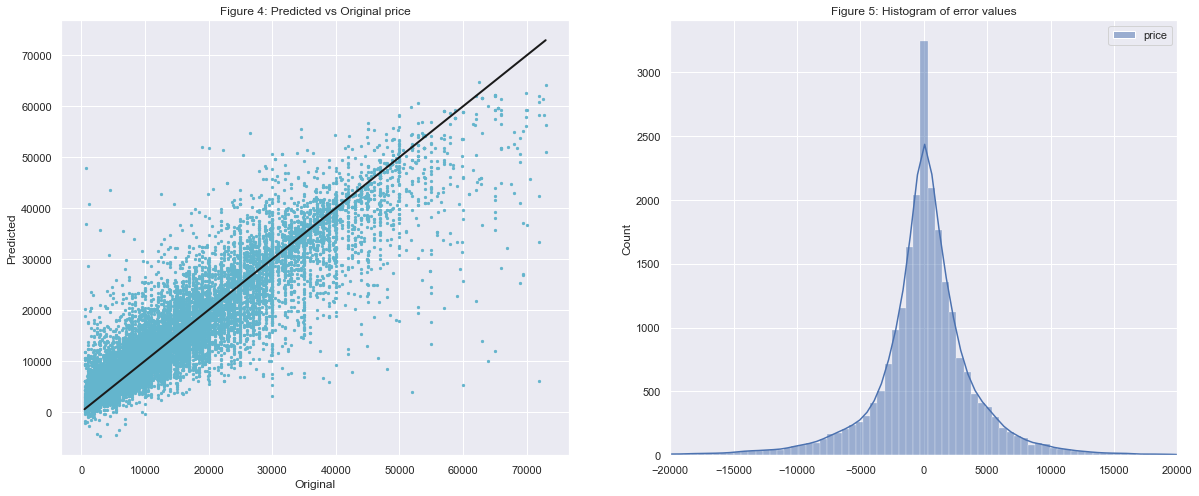

In [78]:
# fig, ax = plt.subplots()
# fig.set_size_inches(10, 10)
plt.figure(figsize = (20, 8))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha = 1, color = "c", s = 5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=2)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.grid()
plt.title("Figure 4: Predicted vs Original price")
#plt.show()
plt.subplot(1,2,2)
sns.histplot(yp - y_test, bins = 200, color="purple", kde = True)
plt.xlim(-20000,20000)
plt.grid()
plt.title("Figure 5: Histogram of error values")
plt.show()

In [48]:
def wmape(predictions, targets):
    wmape_val=np.sum(np.abs(targets - predictions))/sum(targets)
    print("wmape error is: ", (100*wmape_val),"%")
    return wmape_val

In [54]:
np.shape(y_pred)


(23758,)

In [58]:
wmape(y_pred.reshape(23758,1), np.array(y_test))

wmape error is:  [17.79284081] %


array([0.17792841])

In [20]:
yp = y_pred.reshape(23758, 1)

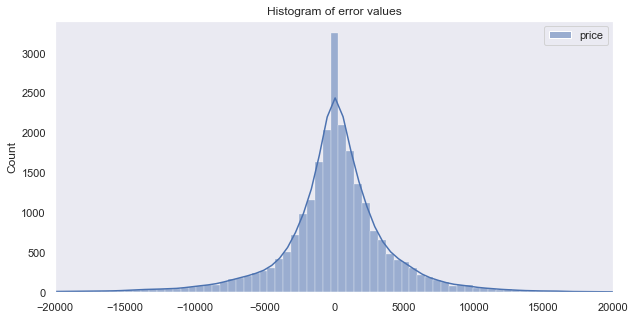

In [32]:
plt.figure(figsize=(10,5))


In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
result = sqrt(mean_squared_error(y_test,y_pred))
# Print the result
print("RMSE:", result)

RMSE: 4637.188602412209


In [70]:
def mape(predictions, targets):
    mape_val=np.mean(np.abs((targets - predictions)/np.abs(targets)))
    print("mape error is: ", (100*mape_val),"%")
    return mape_val

In [71]:
mape(y_pred.reshape(23758,1), np.array(y_test))

mape error is:  32.968348527631655 %


0.3296834852763165

In [75]:
def mdape(predictions, targets):
    mdape_val=np.median(np.abs((targets - predictions)/np.abs(targets)))
    print("mape error is: ", (100*mdape_val),"%")
    return mdape_val
mdape(y_pred.reshape(23758,1), np.array(y_test))

mape error is:  15.884173626104506 %


0.15884173626104506